In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from scipy.stats import mode, trim_mean
from scipy.stats import iqr, skew

In [ ]:
#data file
data = pd.read_csv("/content/recs2009_public.csv")

#"Layout file", which contains descriptive labels and formats for each data variable.
#layout = pd.read_csv('/content/public_layout.csv')


<ipython-input-63-2bbf2e8c549c>:2: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/recs2009_public.csv")


In [ ]:
data.shape

(12083, 940)

In [ ]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  935
Number of Categorical features:  5


In [ ]:
#research paper
selected_columns = ['Climate_Region_Pub',
'AIA_Zone',
'METROMICRO',
'UR',
'HHSEX',
'EMPLOYHH',
'SPOUSE',
'HHAGE',
'ATHOME',
'WORKPAY',
'MONEYPY',
'FOODASST',
'Householder_Race',
'EDUCATION',
'HBUSNESS',
'POVERTY100',
'PERIODEL',
'NUMFLRS',
'NUMAPTS',
'YEARMADE',
'STUDIO',
'NAPTFLRS',
'BEDROOMS',
'TOTROOMS',
'CELLAR',
'BASEFIN',
'BASEHEAT',
'BASECOOL',
'ATTIC',
'PRKGPLC1',
'SIZEOFGARAGE',
'STOVEN',
'STOVE',
'OVENUSE',
'MICRO',
'OUTGRILL',
'TOPGRILL',
'NUMFRIG',
'SEPFREEZ',
'DISHWASH',
'CWASHER',
'DRYER',
'HEATHOME',
'TVCOLOR',
'COMPUTER',
'INTERNET',
'MOISTURE',
'HEATROOM',
'NUMTHERM',
'TEMPHOMEAC',
'AIRCOND',
'ACROOMS',
'TEMPHOMEAC',
'NUMBERAC',
'HIGHCEIL',
'SWIMPOOL',
'AUDIT',
'USENG',
'USEKERO',
'USEWOOD',
'USESOLAR',
'ONSITE',
'ONSITEGRID',
'KERODEL',
'WOODLOGS',
'TOTSQFT',
'TYPEHUQ',
'HDD30YR',
'CDD30YR',
'KOWNRENT',
'TYPEHUQ4',
'USELP',
'USEFO',
'NHSLDMEM',
'KWH']
data=data[selected_columns]


In [ ]:
data.dtypes

Climate_Region_Pub     int64
AIA_Zone               int64
METROMICRO            object
UR                    object
HHSEX                  int64
                       ...  
TYPEHUQ4               int64
USELP                  int64
USEFO                  int64
NHSLDMEM               int64
KWH                    int64
Length: 75, dtype: object

In [ ]:
data.shape

(12083, 75)

In [ ]:
data.head()

,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,HHSEX,EMPLOYHH,SPOUSE,HHAGE,ATHOME,WORKPAY,...,TOTSQFT,TYPEHUQ,HDD30YR,CDD30YR,KOWNRENT,TYPEHUQ4,USELP,USEFO,NHSLDMEM,KWH
0,4,3,METRO,U,1,1,1,35,0,1,...,5075,2,4953,1271,1,-2,1,0,4,18466
1,5,4,METRO,U,1,1,0,40,1,1,...,3136,2,2688,143,2,-2,0,0,6,5148
2,1,2,METRO,U,1,1,0,45,0,1,...,528,5,5741,829,2,-2,0,0,1,2218
3,1,2,METRO,U,1,0,0,75,1,0,...,2023,2,5781,868,1,-2,0,0,1,10015
4,1,3,METRO,U,1,1,0,40,0,1,...,1912,3,5313,797,1,-2,1,0,1,2869


In [ ]:
#layout.head()

In [ ]:
data.shape#, layout.shape

(12083, 75)

In [ ]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  73
Number of Categorical features:  2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Climate_Region_Pub  12083 non-null  int64 
 1   AIA_Zone            12083 non-null  int64 
 2   METROMICRO          12083 non-null  object
 3   UR                  12083 non-null  object
 4   HHSEX               12083 non-null  int64 
 5   EMPLOYHH            12083 non-null  int64 
 6   SPOUSE              12083 non-null  int64 
 7   HHAGE               12083 non-null  int64 
 8   ATHOME              12083 non-null  int64 
 9   WORKPAY             12083 non-null  int64 
 10  MONEYPY             12083 non-null  int64 
 11  FOODASST            12083 non-null  int64 
 12  Householder_Race    12083 non-null  int64 
 13  EDUCATION           12083 non-null  int64 
 14  HBUSNESS            12083 non-null  int64 
 15  POVERTY100          12083 non-null  int64 
 16  PERIODEL            12

In [ ]:
#central tendency measures on numerical columns
def midhinge(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    return (q1 + q3) / 2

# Function to calculate the trimean
def trimean(series):
    mean = np.mean(series)
    median = np.median(series)
    trimmed = trim_mean(series, proportiontocut=0.1)  # You can adjust the proportiontocut as needed
    return (mean + 2 * median + trimmed) / 4

# Define functions for mode, quartile, truncated mean
def mode(series):
    return series.mode().iloc[0]

def quartile(series, q):
    return np.percentile(series, q * 100)

def truncated_mean(series, alpha):
    sorted_series = np.sort(series)
    n = len(sorted_series)
    trim_count = int(alpha * n)
    trimmed_series = sorted_series[trim_count:-trim_count]
    return np.mean(trimmed_series)

# Calculate the statistics for each column
grouped_statistics = {}
for column in data.select_dtypes(include='number').columns:
    grouped_statistics[column] = {
        'Mean': data[column].mean()/data[column].max(),
        'Median': data[column].median()/data[column].max(),
        'Mode': mode(data[column])/data[column].max(),
        'Quartile': quartile(data[column]/data[column].max(), 0.25),
        'Midhinge': midhinge(data[column]/data[column].max()),
        'Truncated Mean': truncated_mean(data[column]/data[column].max(), 0.1),  # Adjust alpha as needed
        'Trimean': trimean(data[column]/data[column].max()),
    }
result_df = pd.DataFrame(grouped_statistics)
print(result_df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                Climate_Region_Pub  AIA_Zone     HHSEX  EMPLOYHH    SPOUSE  \
Mean                      0.520202  0.653000  0.735124  0.365182  0.594223   
Median                    0.600000  0.600000  0.500000  0.500000  1.000000   
Mode                      0.200000  0.600000  0.500000  0.500000  1.000000   
Quartile                  0.200000  0.400000  0.500000  0.000000  0.000000   
Midhinge                  0.500000  0.600000  0.750000  0.250000  0.500000   
Truncated Mean            0.511182  0.665708  0.731406  0.331489  0.617772   
Trimean                   0.557846  0.629677  0.616632  0.424168  0.802999   

                   HHAGE    ATHOME   WORKPAY   MONEYPY  FOODASST  ...  \
Mean            0.585193  0.569478  0.766780  0.542808  0.106596  ...   
Median          0.576471  1.000000  1.000000  0.500000  0.000000  ...   
Mode            1.000000  1.000000  1.000000  1.000000  0.000000  ...   
Quartile        0.435294  0.000000  1.000000  0.333333  0.000000  ...   
Midhinge  

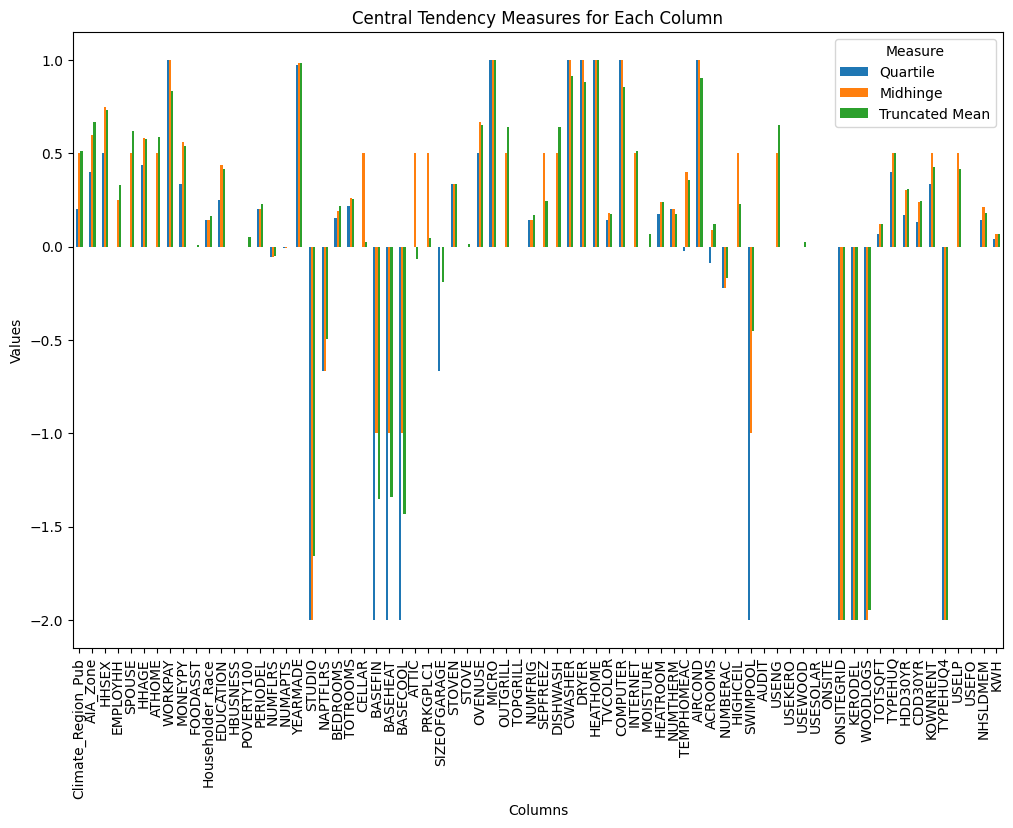

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
result_df.T.plot(kind='bar', ax=ax)
plt.title('Central Tendency Measures for Each Column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend(title='Measure', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#central tendency measures on categorical columns
data.describe(include=['object'])

,METROMICRO,UR
count,12083,12083
unique,3,2
top,METRO,U
freq,10302,9656


<ipython-input-77-6c31218b4694>:8: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result_df.loc[col, 'Mean Absolute Deviation'] = data[col].mad()
<ipython-input-77-6c31218b4694>:8: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result_df.loc[col, 'Mean Absolute Deviation'] = data[col].mad()
<ipython-input-77-6c31218b4694>:8: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result_df.loc[col, 'Mean Absolute Deviation'] = data[col].mad()
<ipython-input-77-6c31218b4694>:8: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result_df.loc[col, 'Mean

Results DataFrame:
                       Range  Standard Deviation  Mean Absolute Deviation  \
Climate_Region_Pub       4.0            1.349571                 1.228861   
AIA_Zone                 4.0            1.278652                 1.095377   
HHSEX                    1.0            0.499135                 0.498230   
EMPLOYHH                 2.0            0.646865                 0.555617   
SPOUSE                   1.0            0.491062                 0.482244   
...                      ...                 ...                      ...   
TYPEHUQ4                 3.0            0.472066                 0.191630   
USELP                    1.0            0.495388                 0.490778   
USEFO                    1.0            0.263105                 0.138437   
NHSLDMEM                13.0            1.515664                 1.214272   
KWH                 150237.0         7641.190845              5660.359680   

                    Interquartile Range  Outliers  Skewn

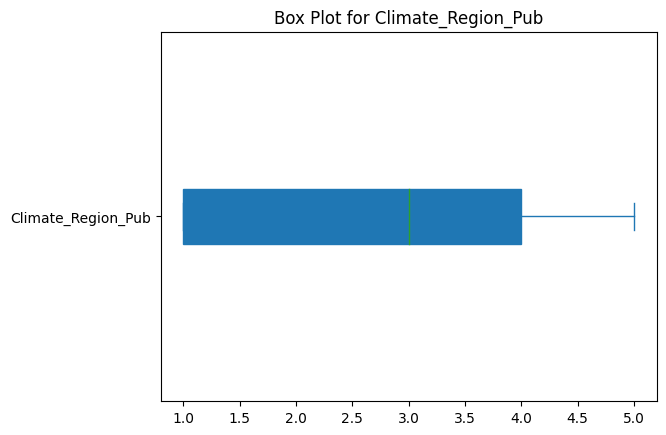

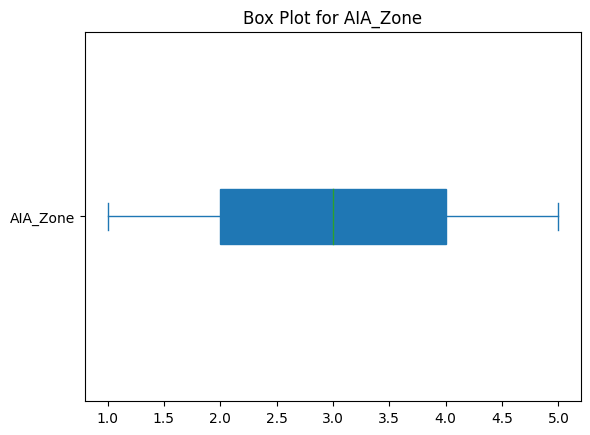

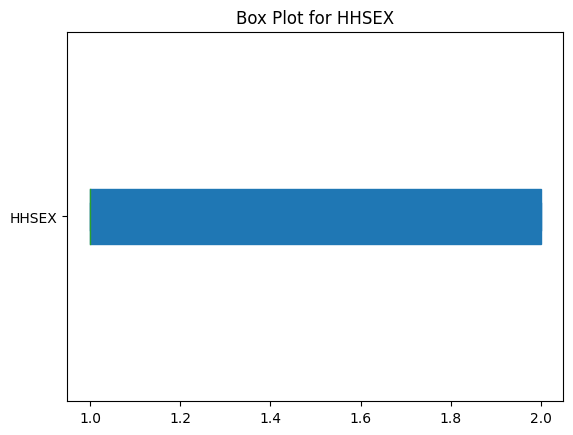

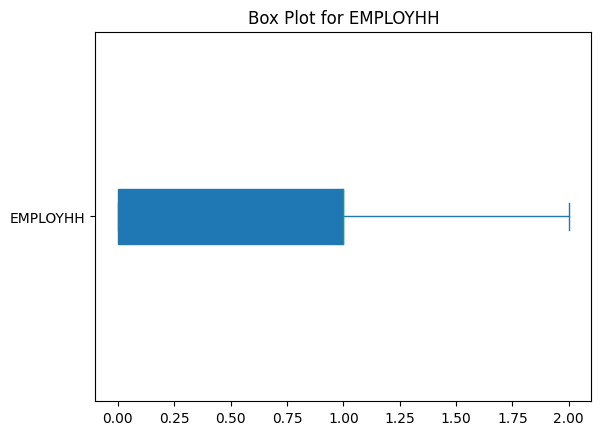

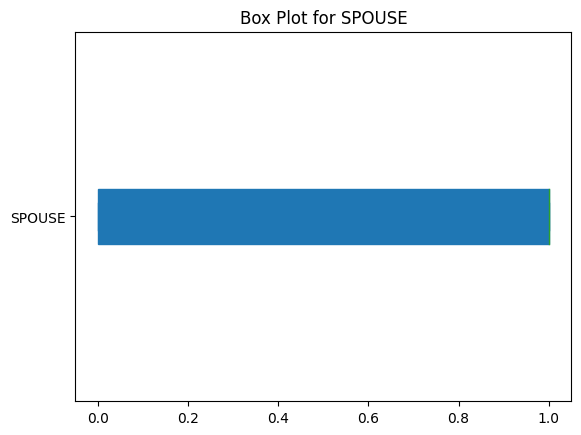

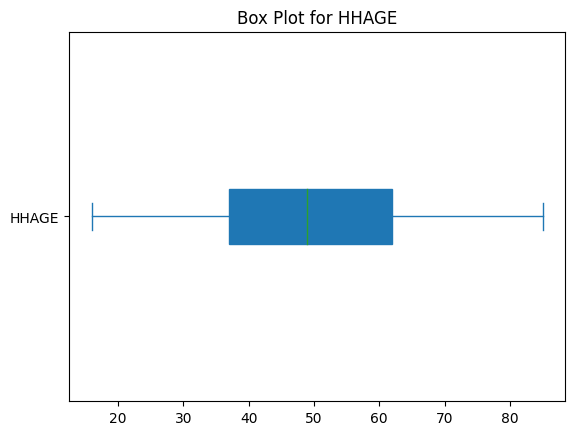

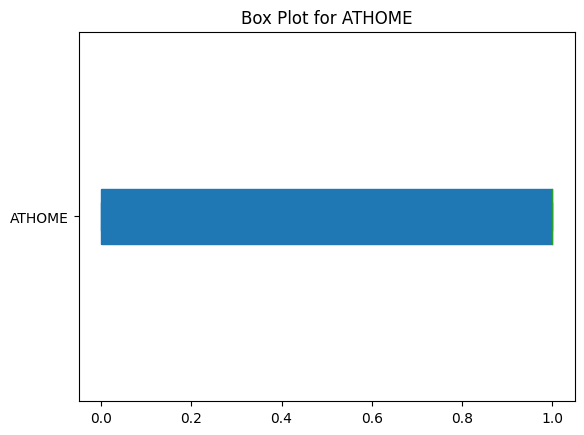

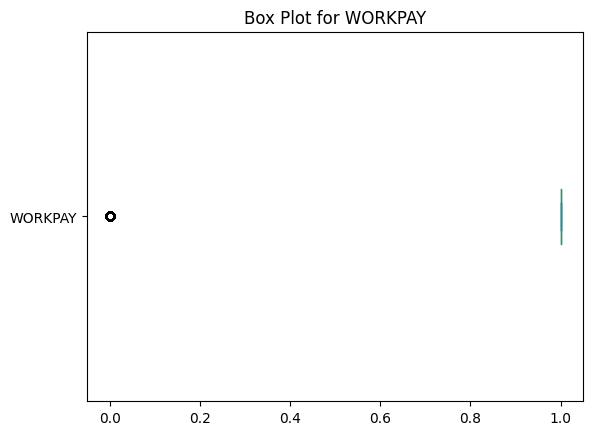

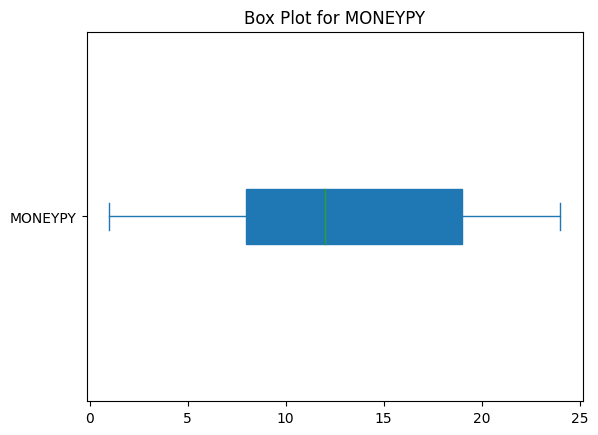

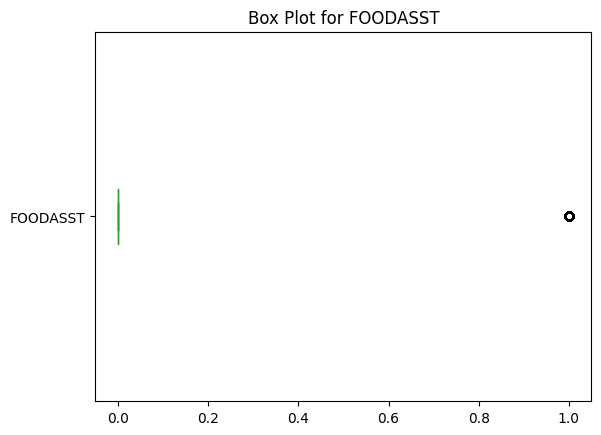

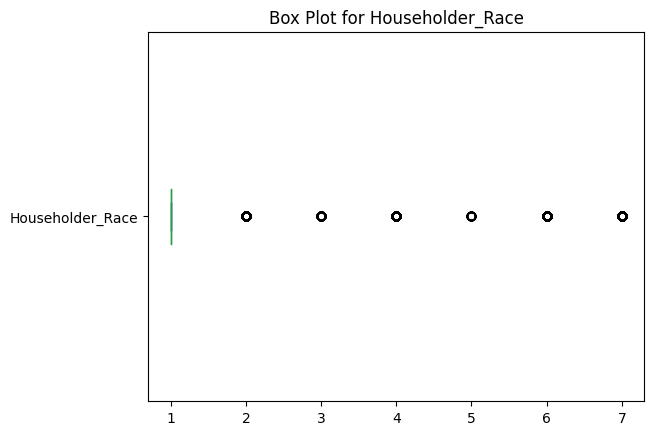

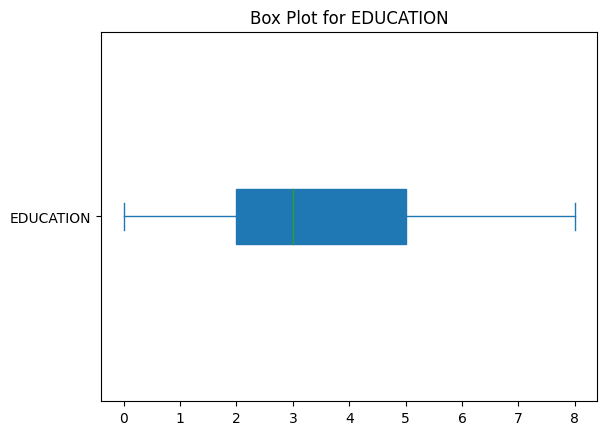

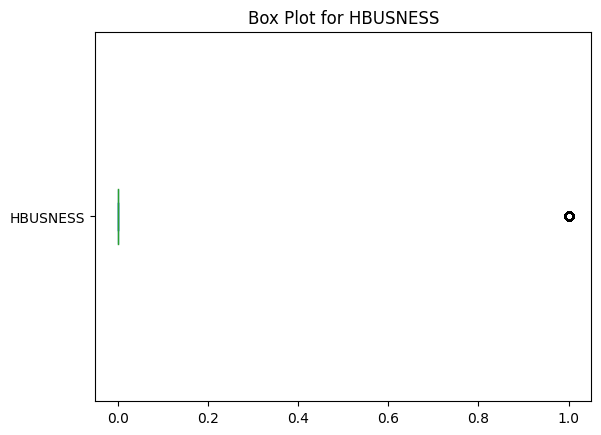

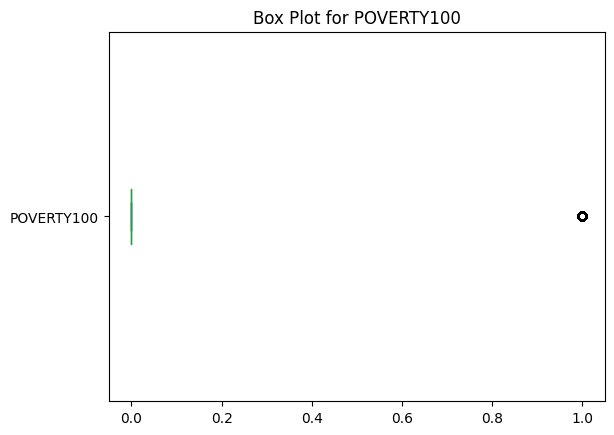

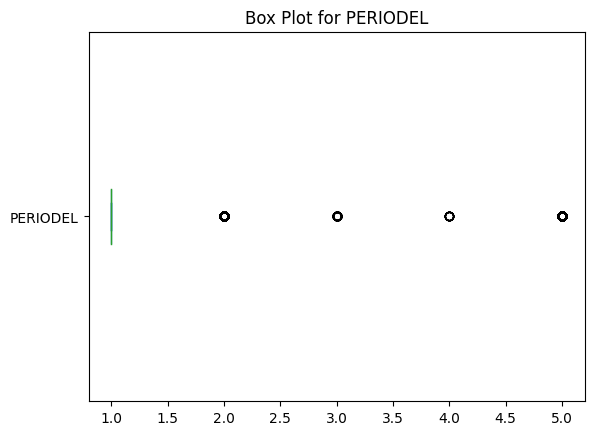

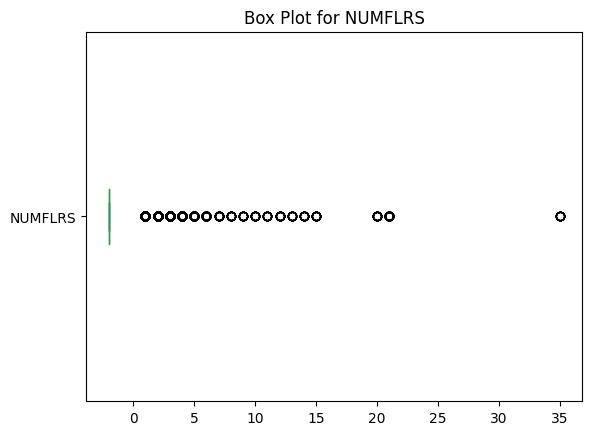

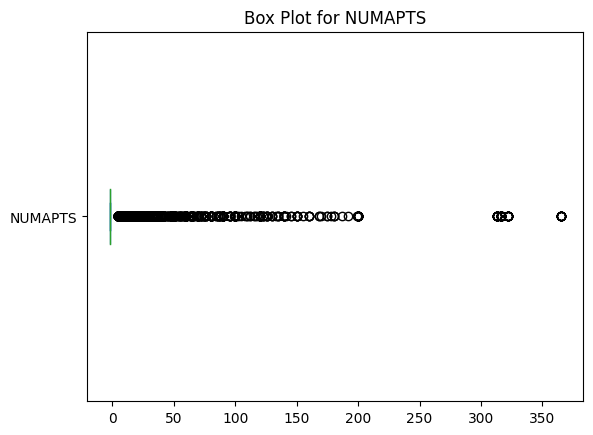

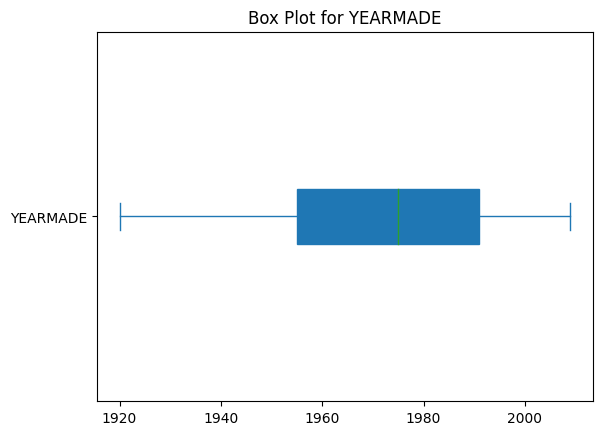

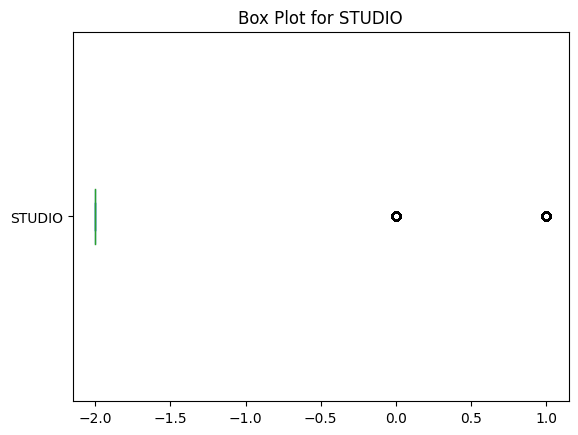

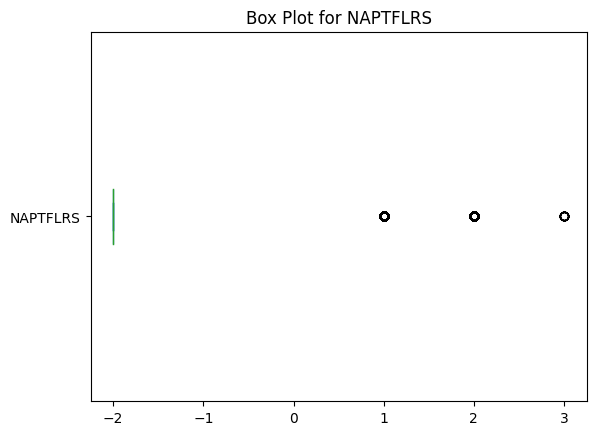

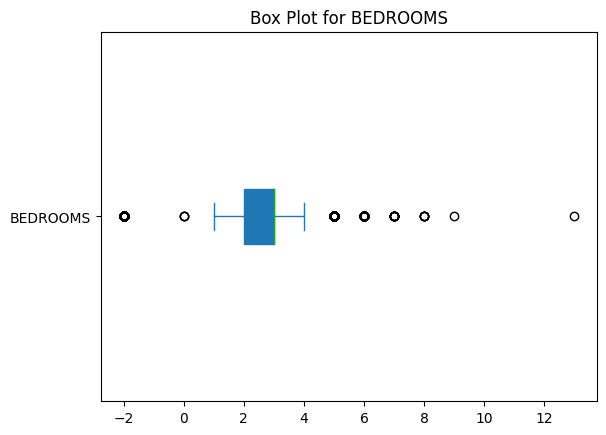

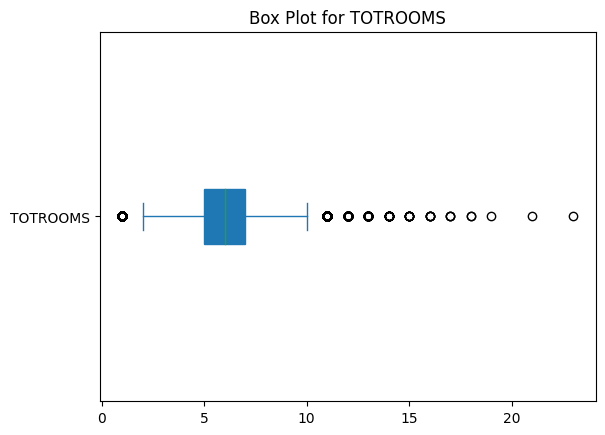

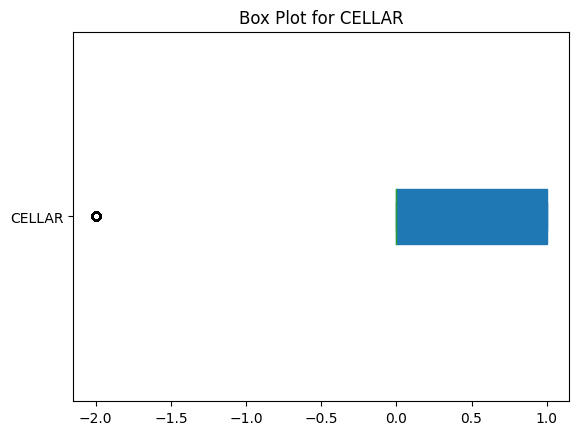

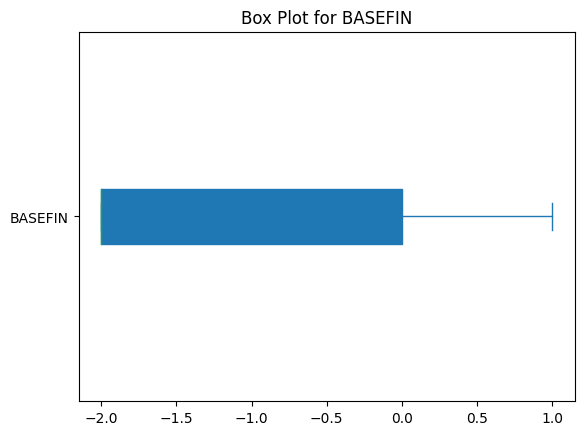

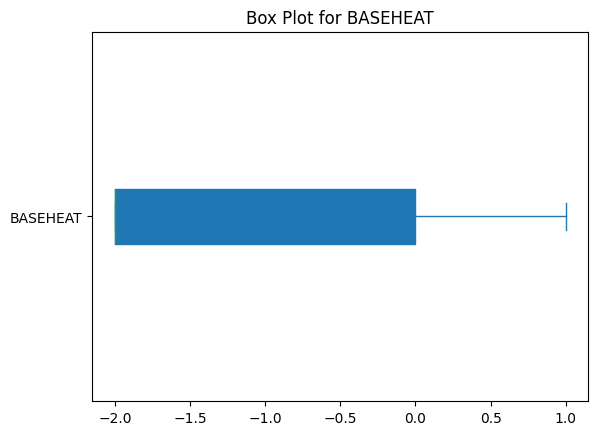

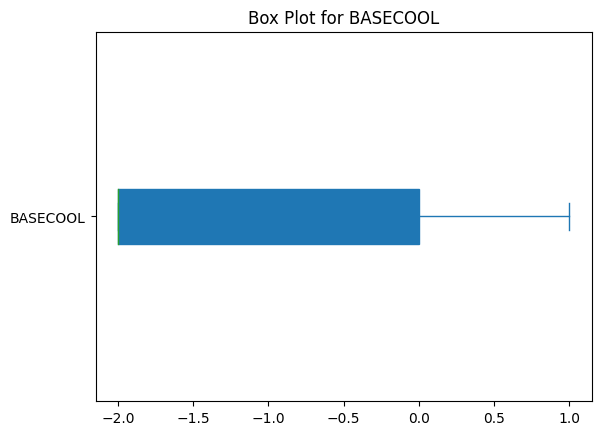

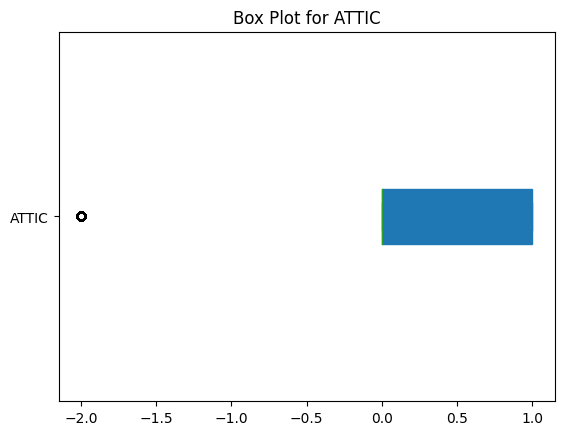

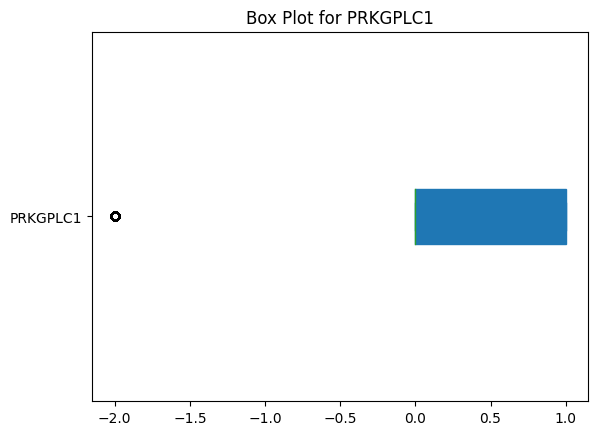

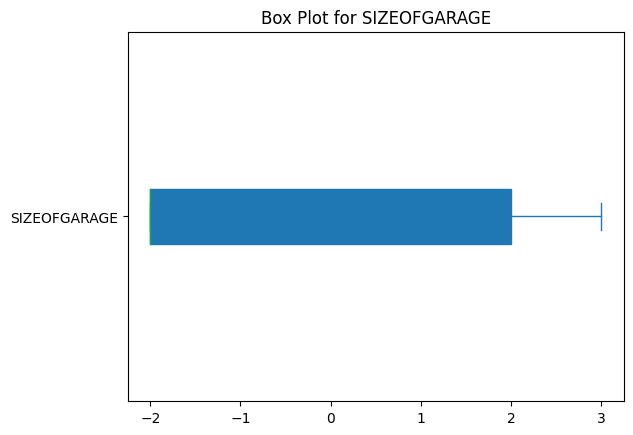

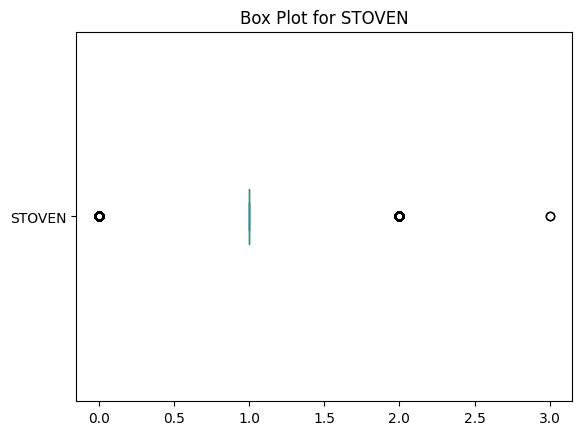

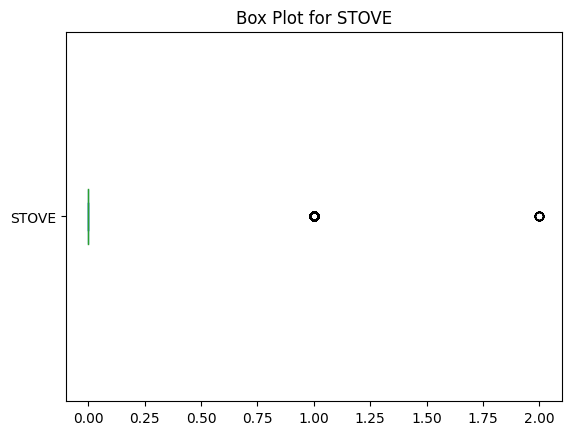

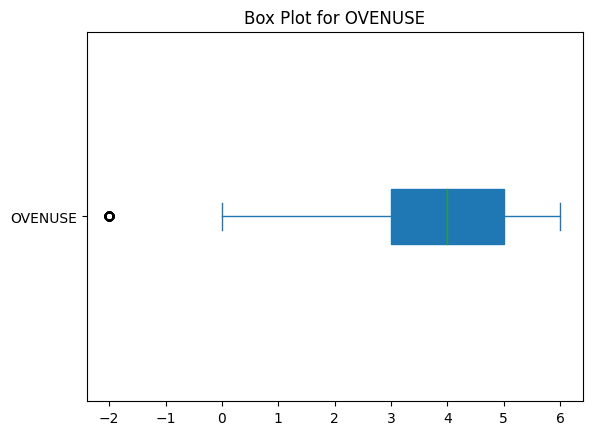

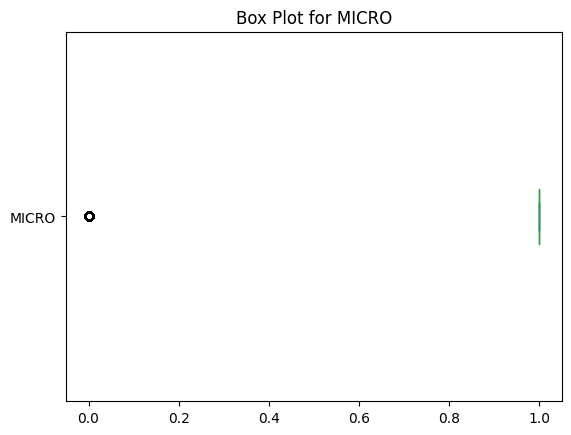

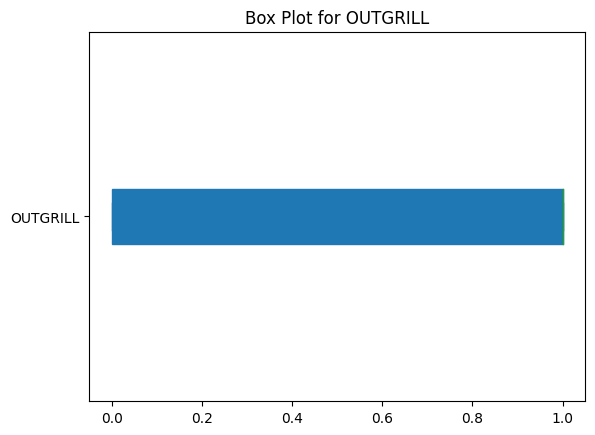

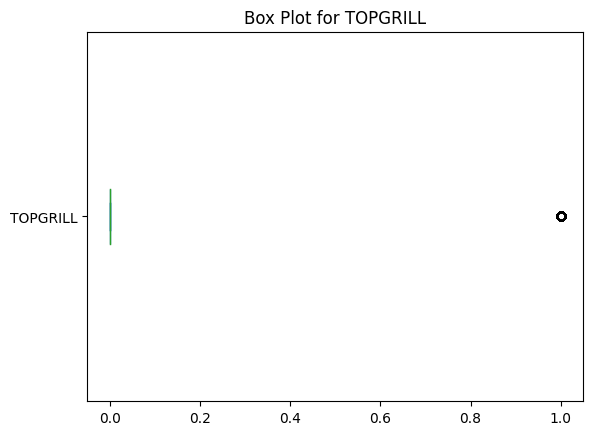

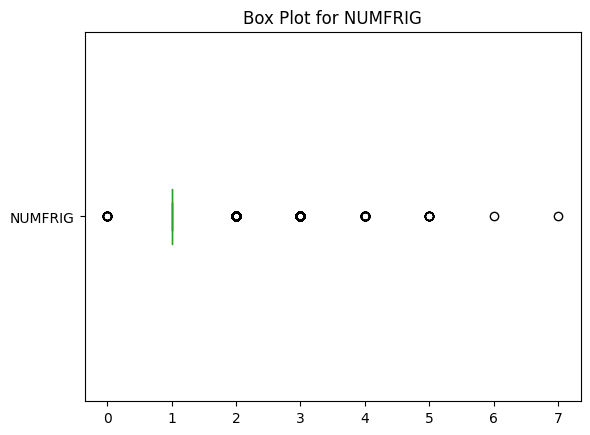

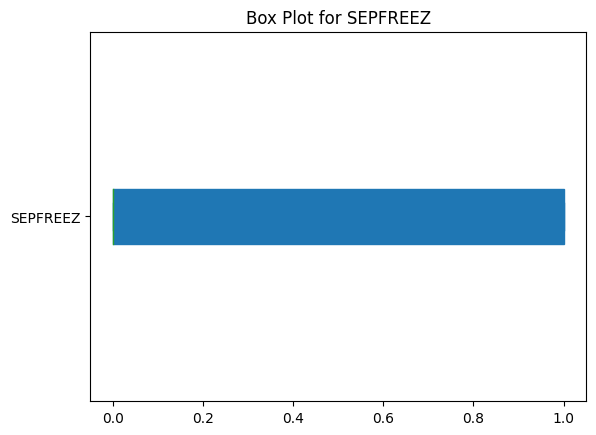

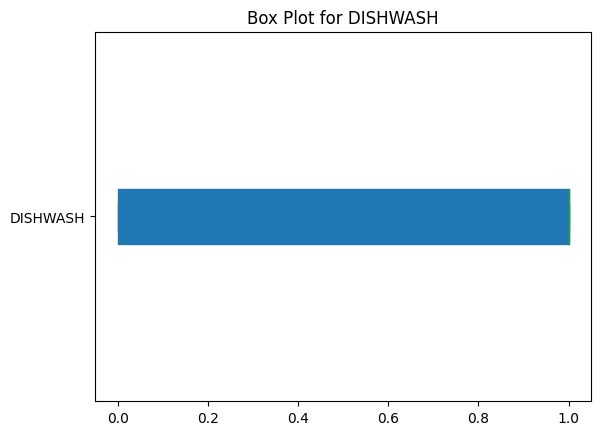

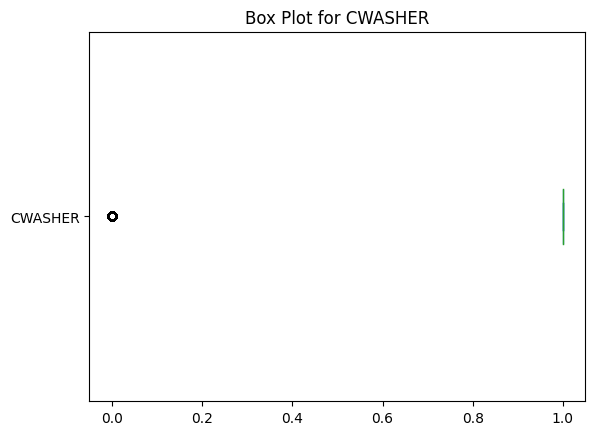

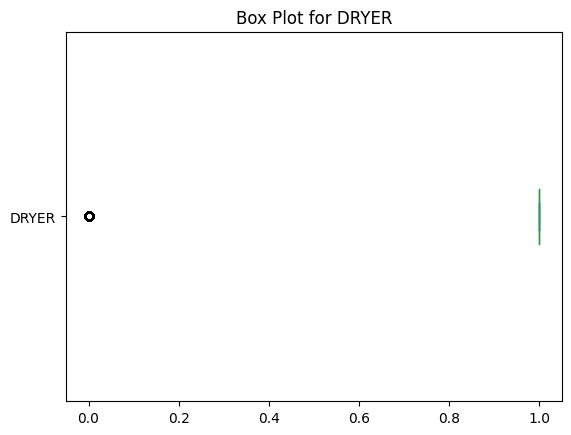

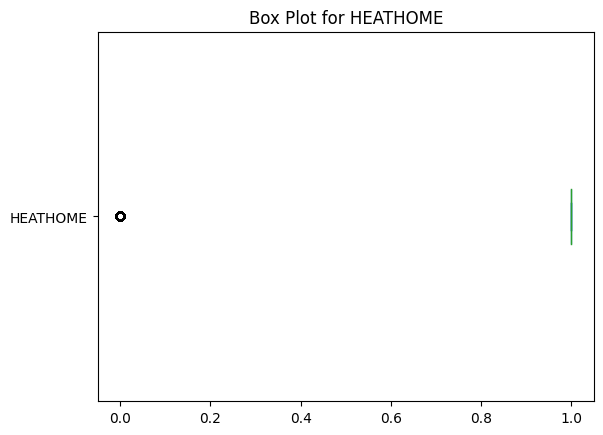

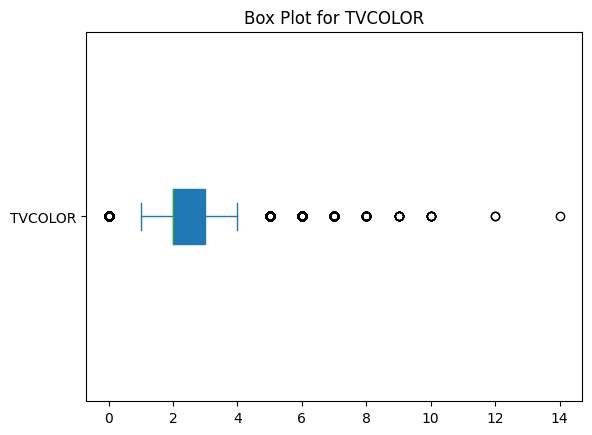

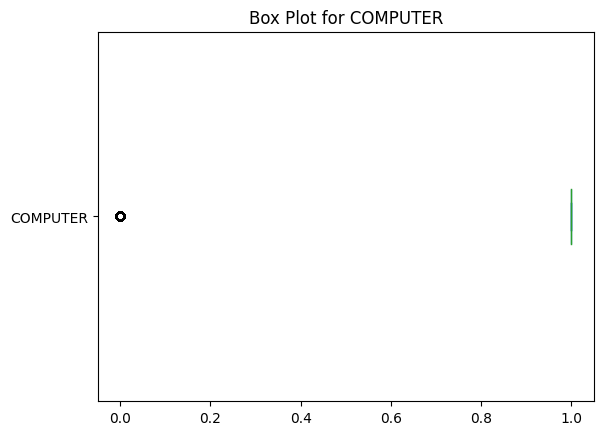

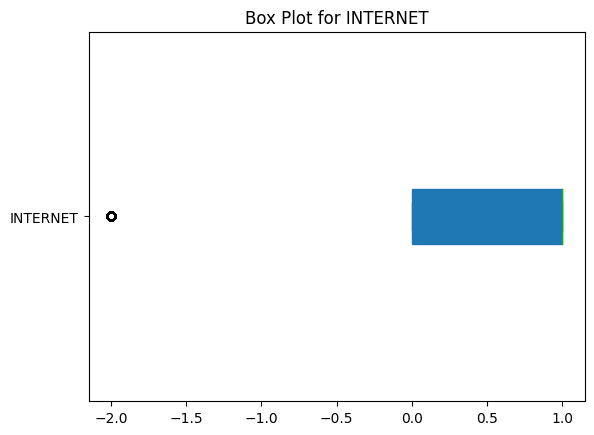

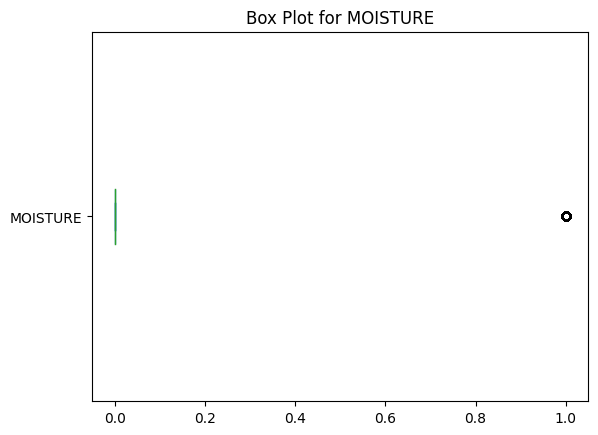

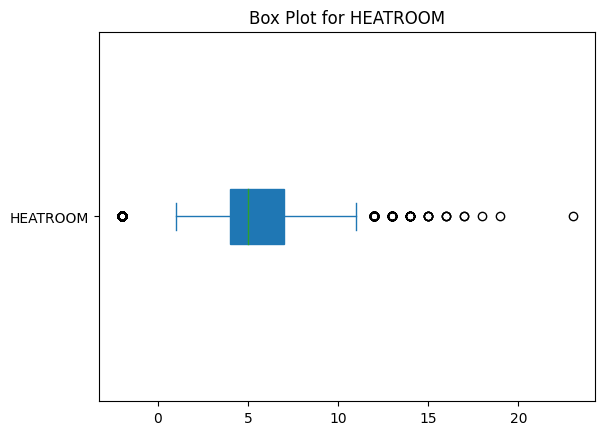

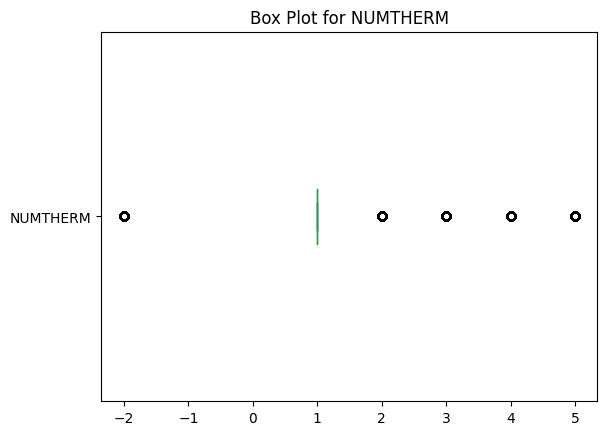

TypeError: no numeric data to plot

In [ ]:
#dispersion
numerical_columns = data.select_dtypes(include=np.number).columns
result_df = pd.DataFrame(index=numerical_columns)

for col in numerical_columns:
    result_df.loc[col, 'Range'] = data[col].max() - data[col].min()
    result_df.loc[col, 'Standard Deviation'] = data[col].std()
    result_df.loc[col, 'Mean Absolute Deviation'] = data[col].mad()
    result_df.loc[col, 'Interquartile Range'] = data[col].quantile(0.75) - data[col].quantile(0.25)

    # Detecting outliers
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
    result_df.loc[col, 'Outliers'] = outliers.sum()

    # Calculating skewness
    result_df.loc[col, 'Skewness'] = skew(data[col])

# Displaying the result DataFrame
print("Results DataFrame:")
print(result_df)

# Creating box plots for each numerical column
for col in numerical_columns:
    data[col].plot(kind='box', vert=False, patch_artist=True)
    plt.title(f'Box Plot for {col}')
    plt.show()

In [ ]:
#shape analysis
#kurtosis
data.kurtosis()

<ipython-input-78-487e600c11b8>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


Climate_Region_Pub    -1.439978
AIA_Zone              -1.063036
HHSEX                 -1.986111
EMPLOYHH              -0.722498
SPOUSE                -1.852992
                        ...    
TYPEHUQ4              21.252518
USELP                 -1.925136
USEFO                  8.451010
NHSLDMEM               2.543374
KWH                   13.917123
Length: 73, dtype: float64

In [ ]:
data.skew()

<ipython-input-79-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Climate_Region_Pub    0.081109
AIA_Zone             -0.147103
HHSEX                 0.119236
EMPLOYHH              0.326730
SPOUSE               -0.383817
                        ...   
TYPEHUQ4              4.702261
USELP                 0.274195
USEFO                 3.232586
NHSLDMEM              1.241919
KWH                   2.114188
Length: 73, dtype: float64

In [ ]:
correlation_matrix = data.corr()


<ipython-input-80-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
correlation_matrix["KWH"]

Climate_Region_Pub    0.175729
AIA_Zone              0.200823
HHSEX                 0.015663
EMPLOYHH              0.040046
SPOUSE                0.260020
                        ...   
TYPEHUQ4              0.045430
USELP                 0.218624
USEFO                -0.087739
NHSLDMEM              0.273410
KWH                   1.000000
Name: KWH, Length: 73, dtype: float64

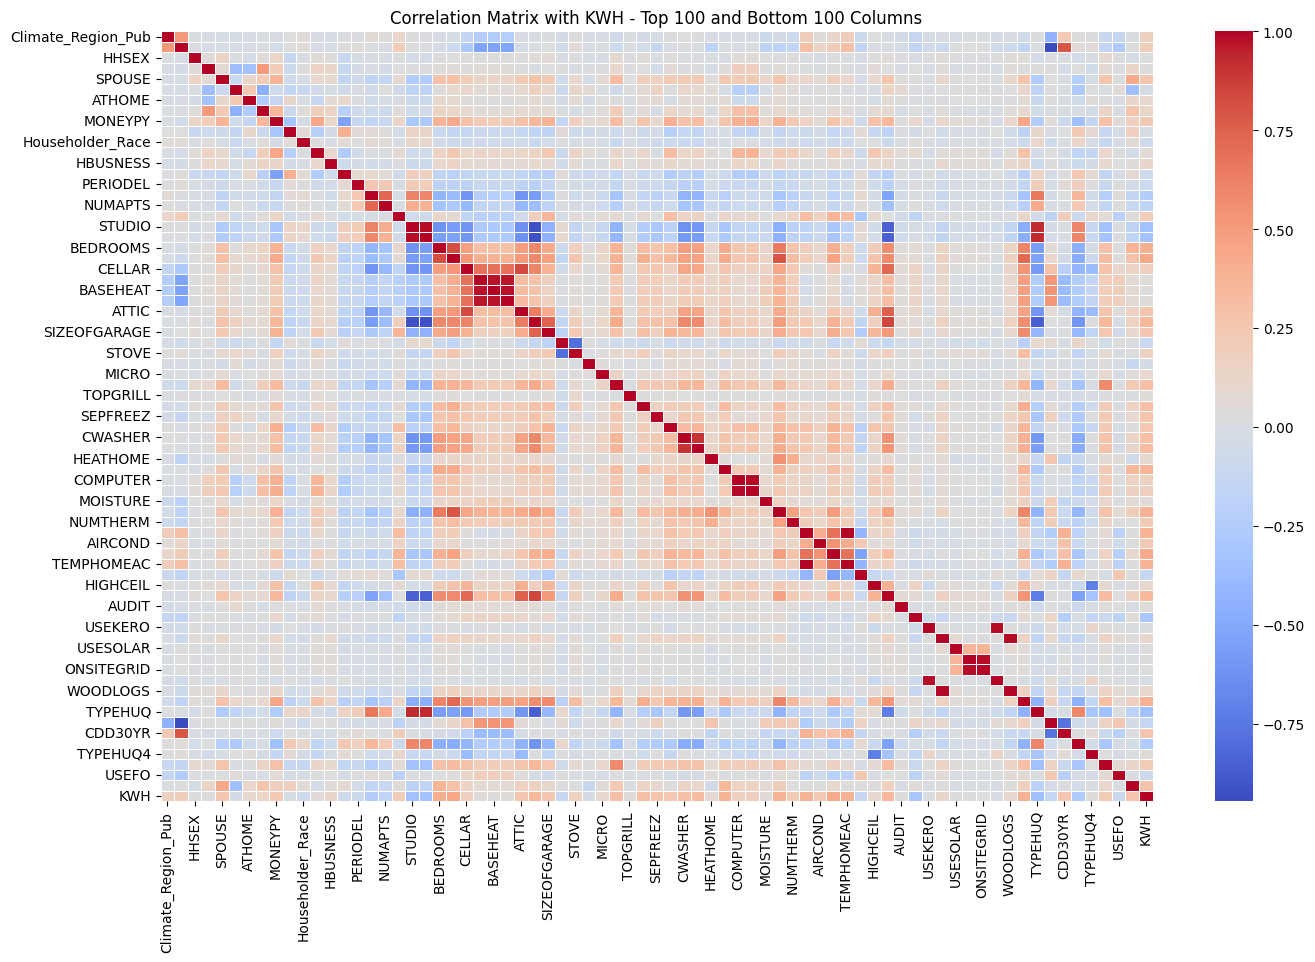

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with KWH - Top 100 and Bottom 100 Columns')
plt.show()

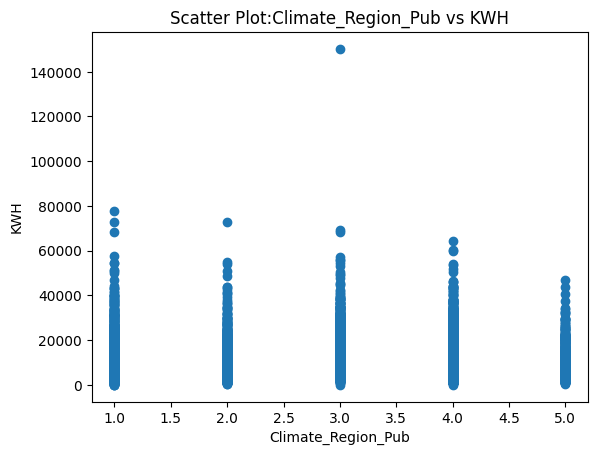

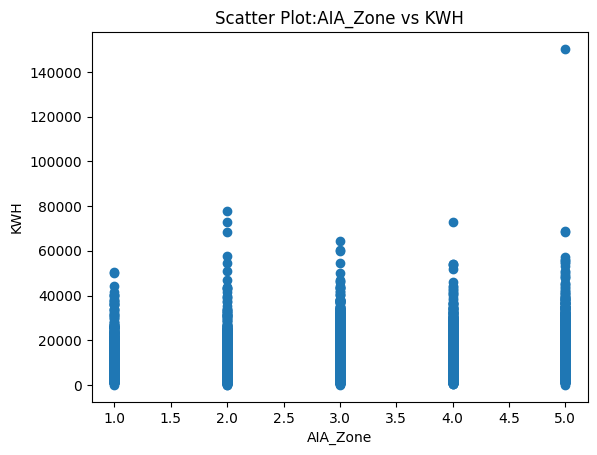

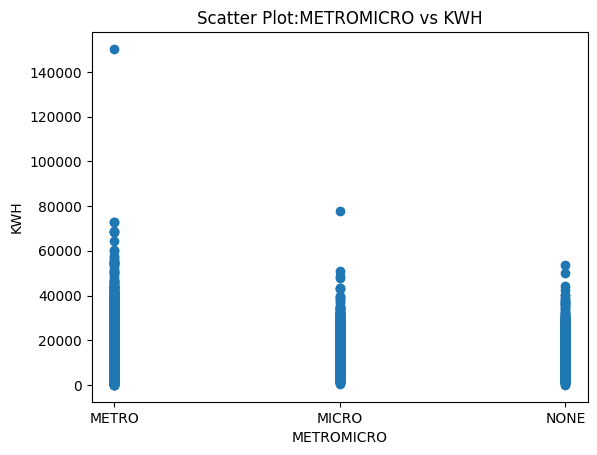

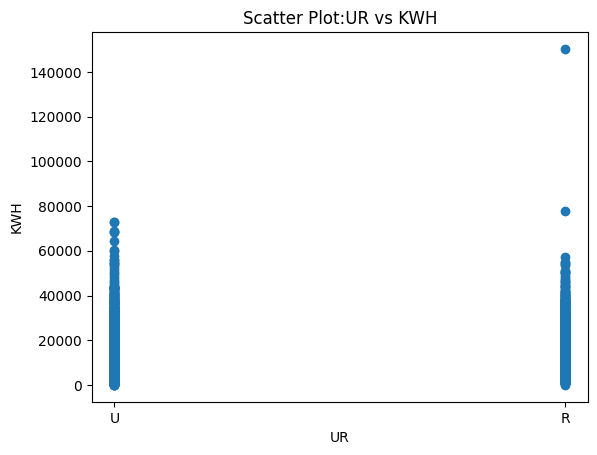

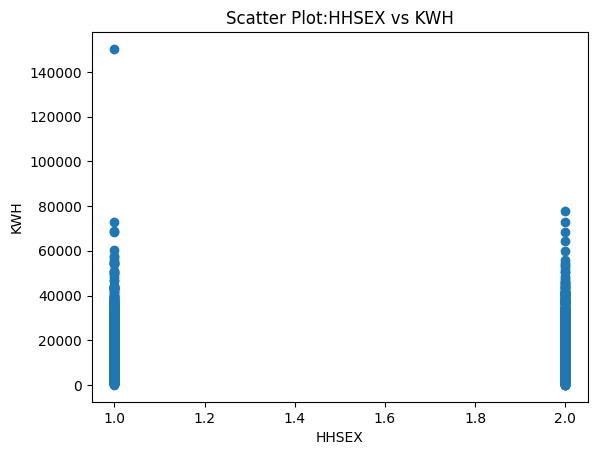

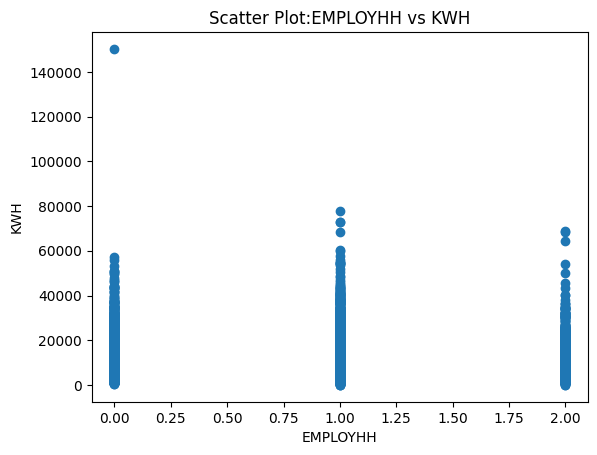

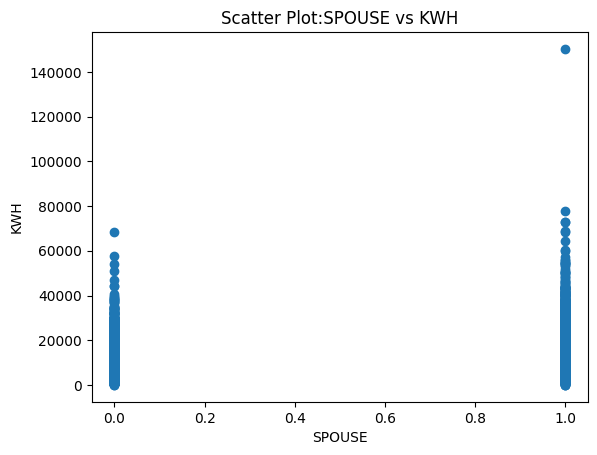

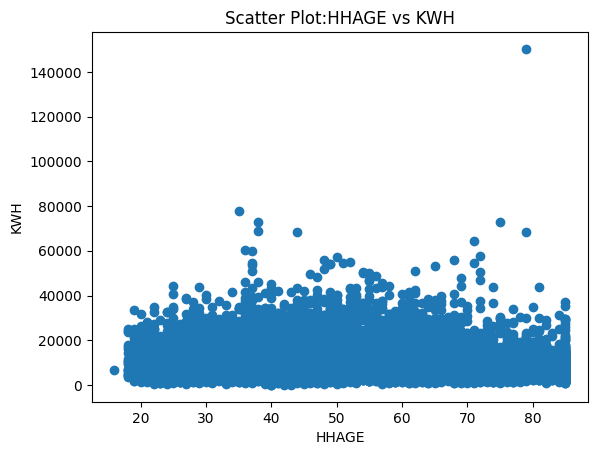

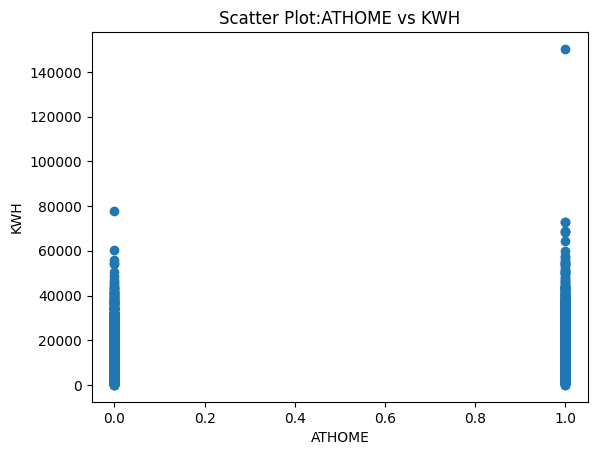

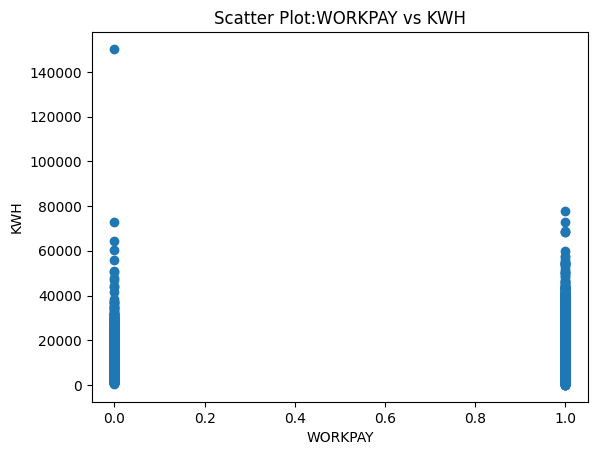

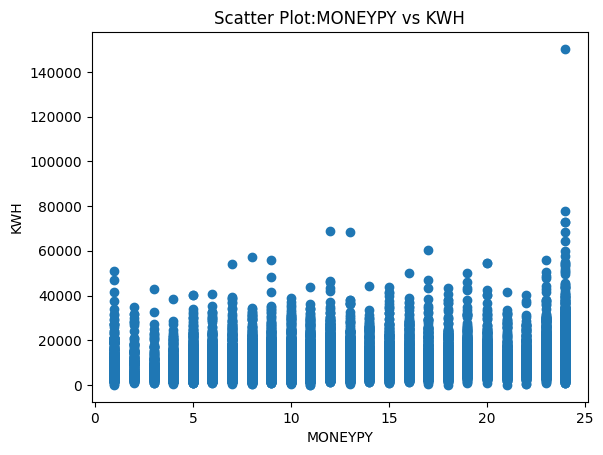

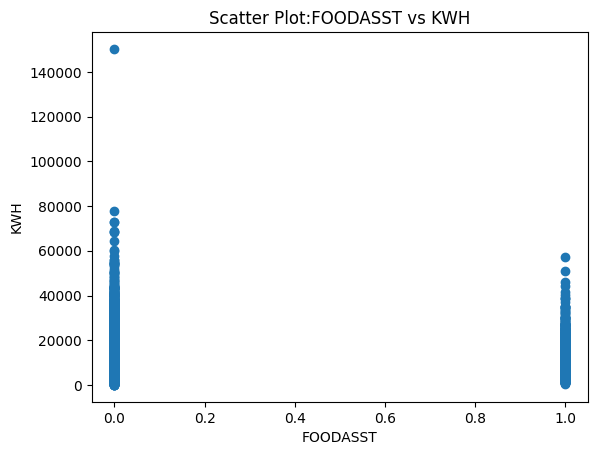

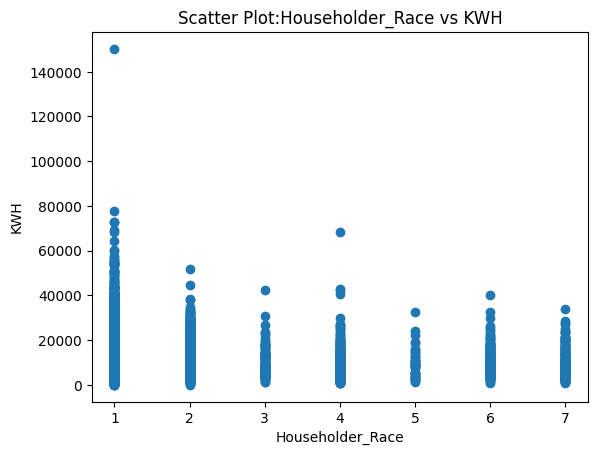

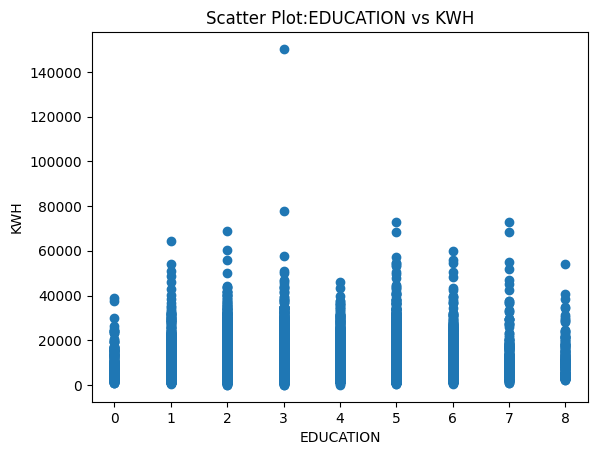

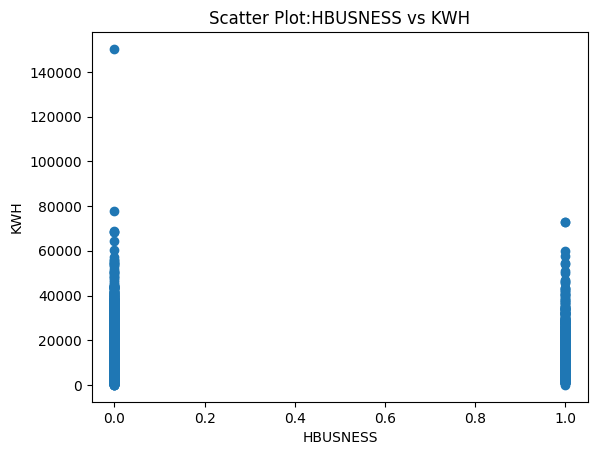

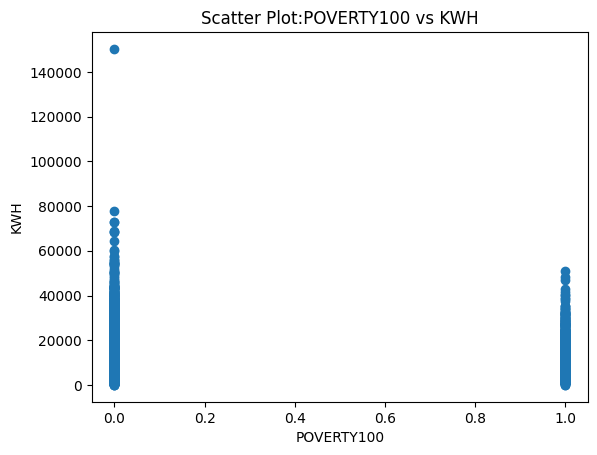

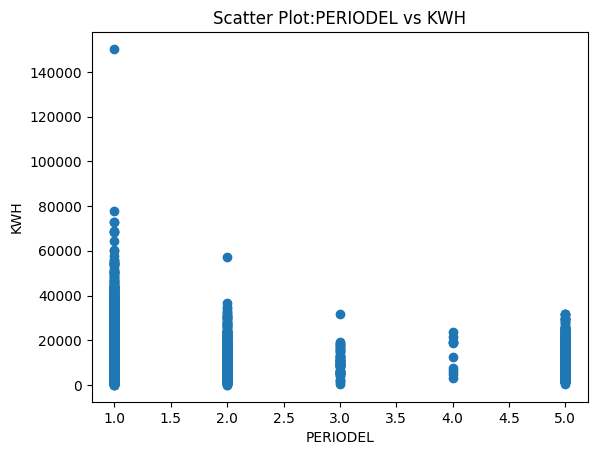

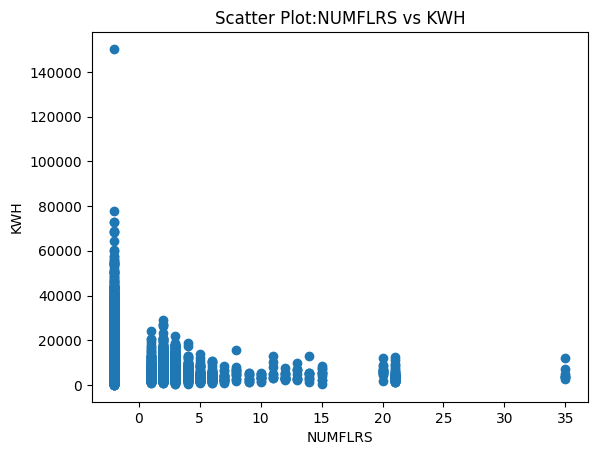

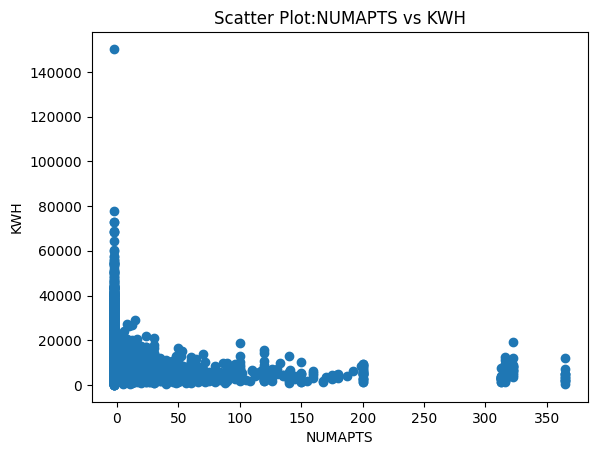

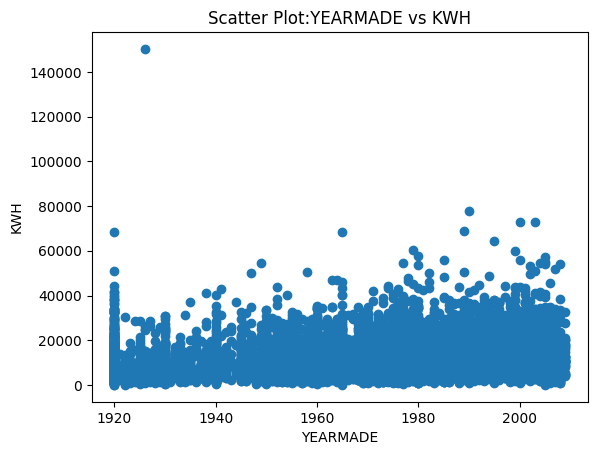

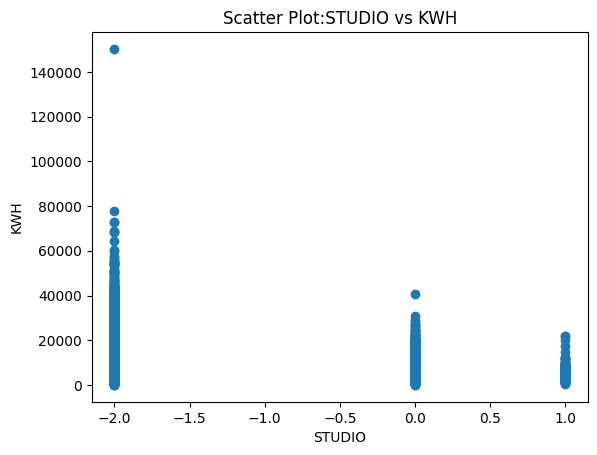

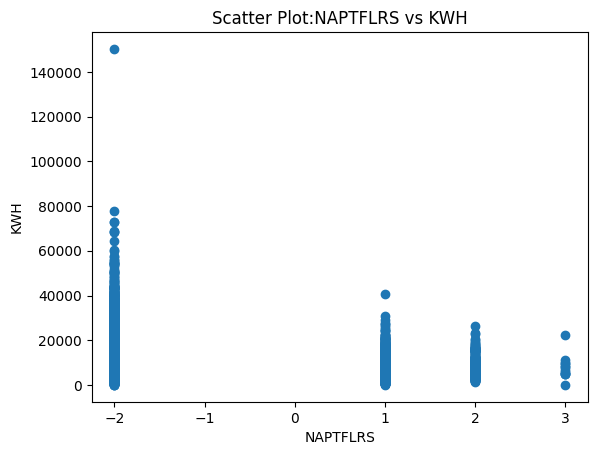

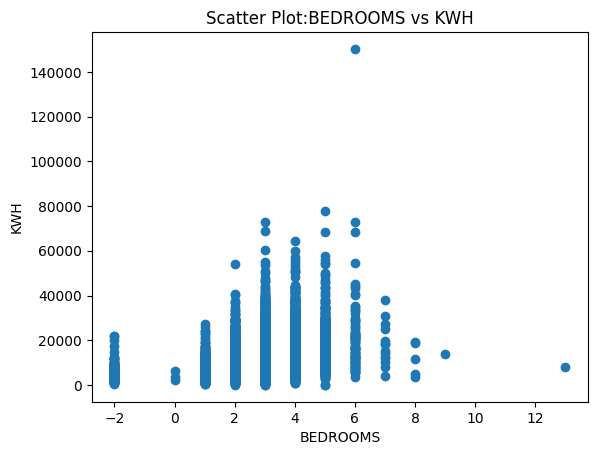

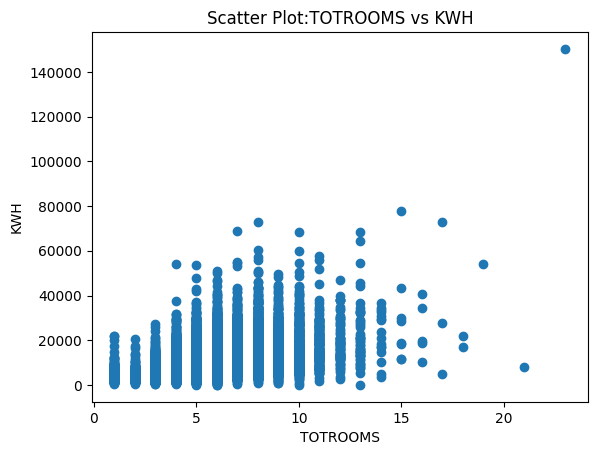

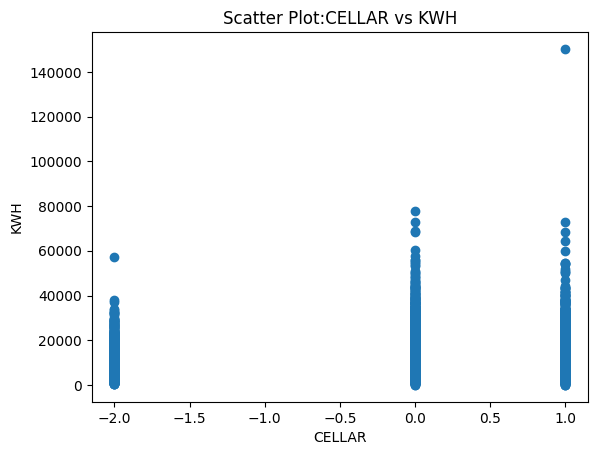

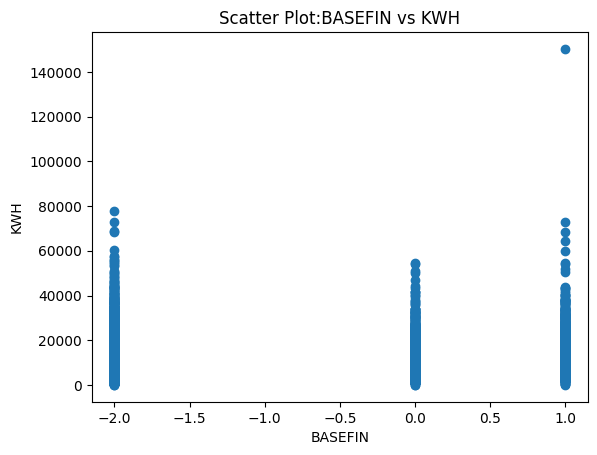

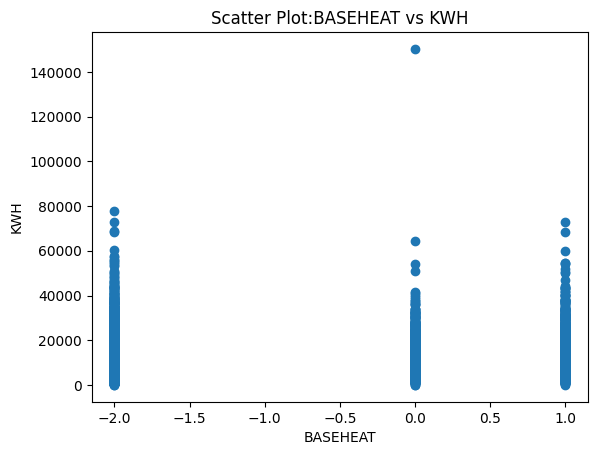

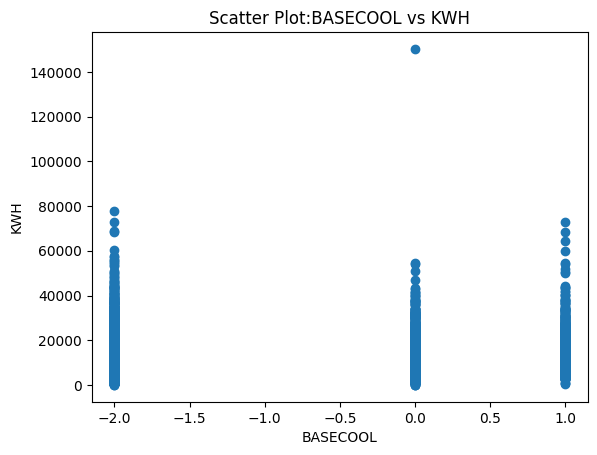

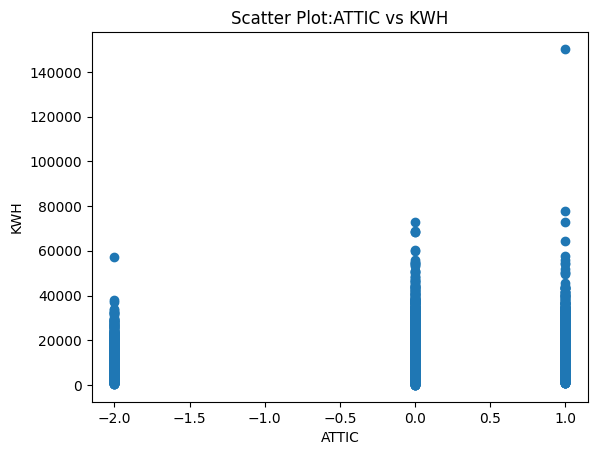

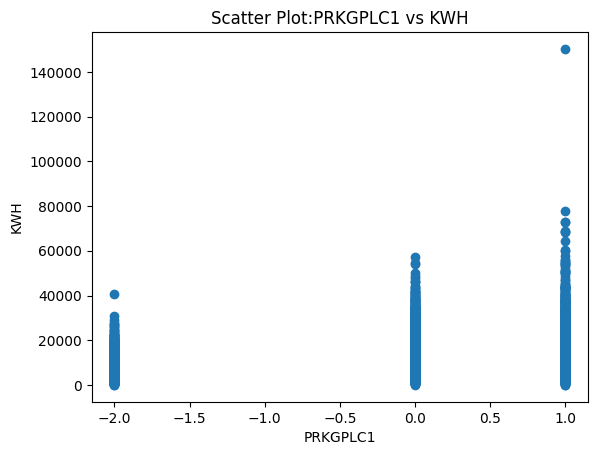

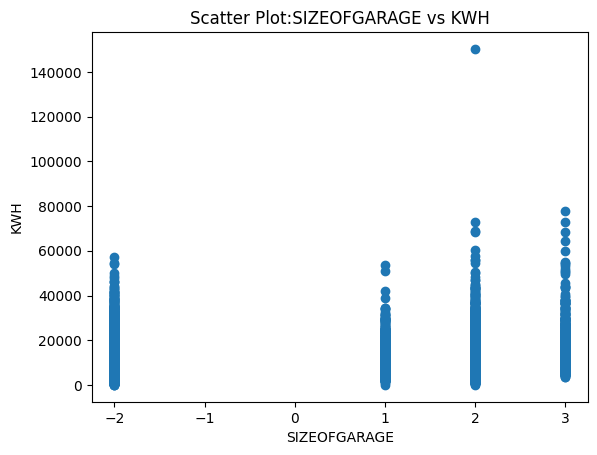

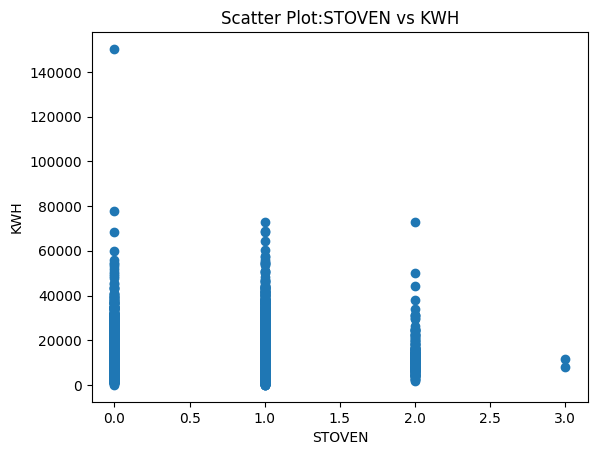

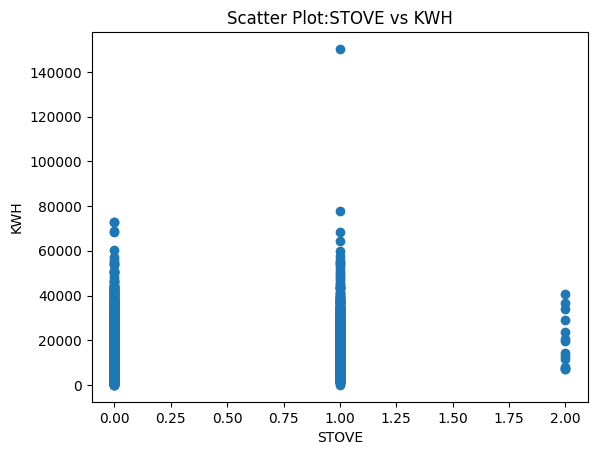

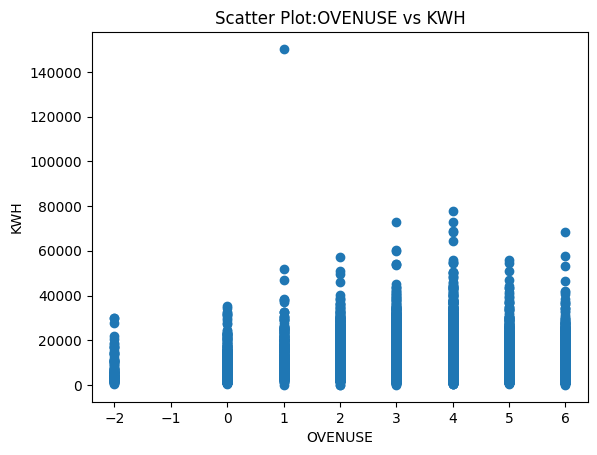

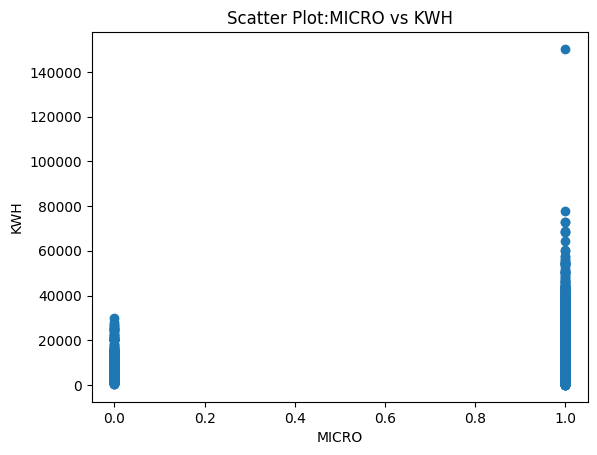

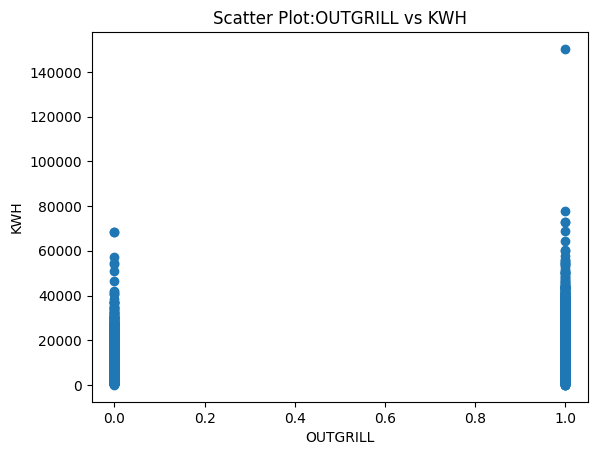

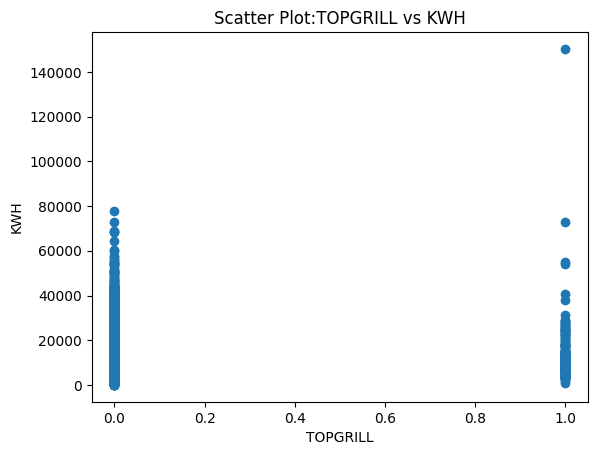

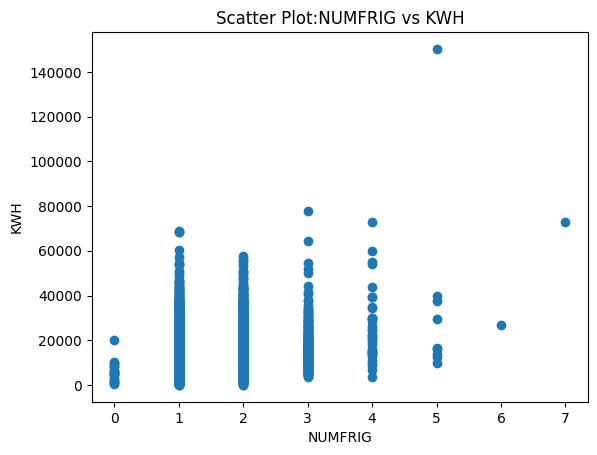

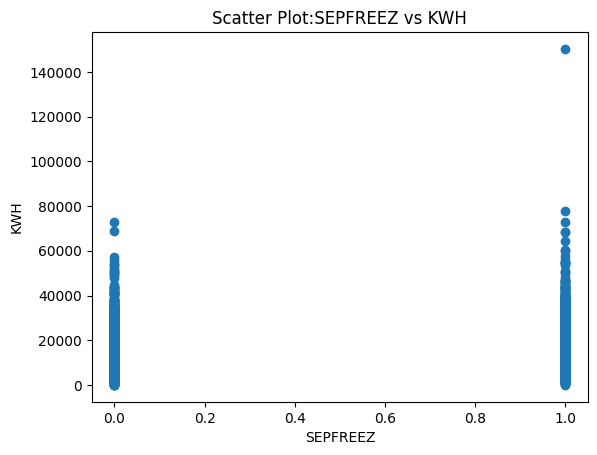

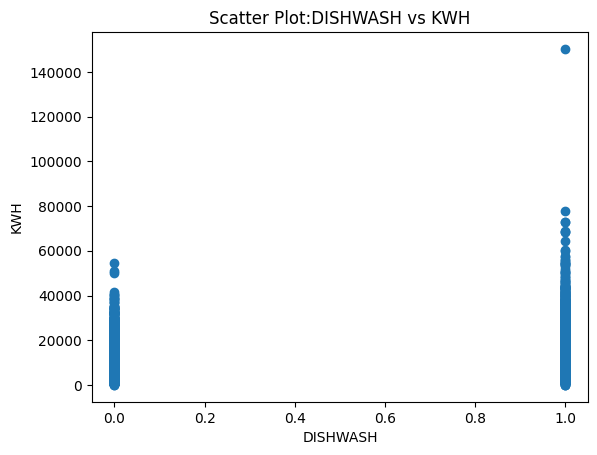

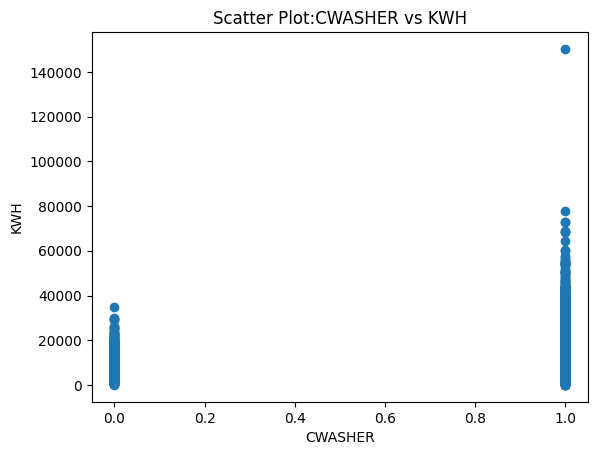

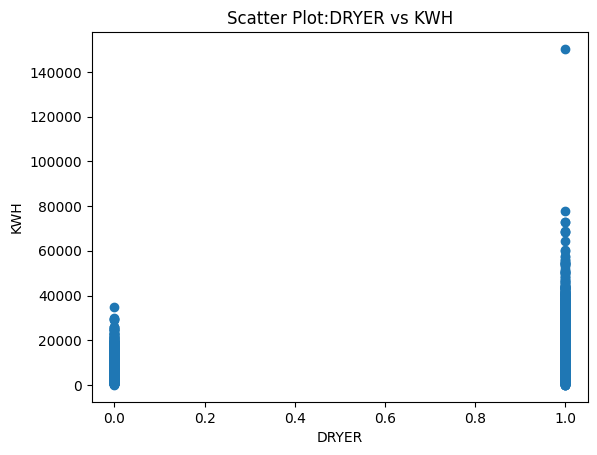

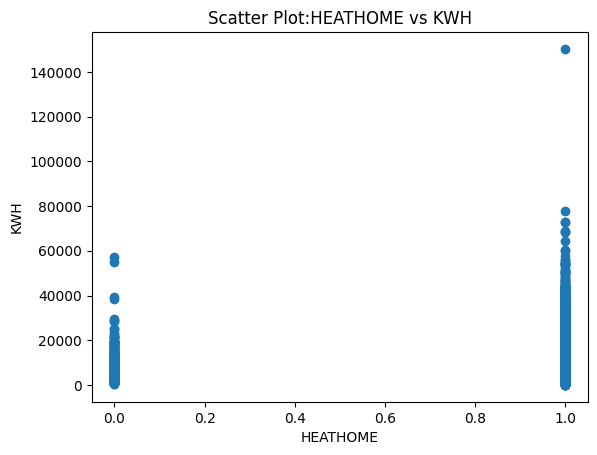

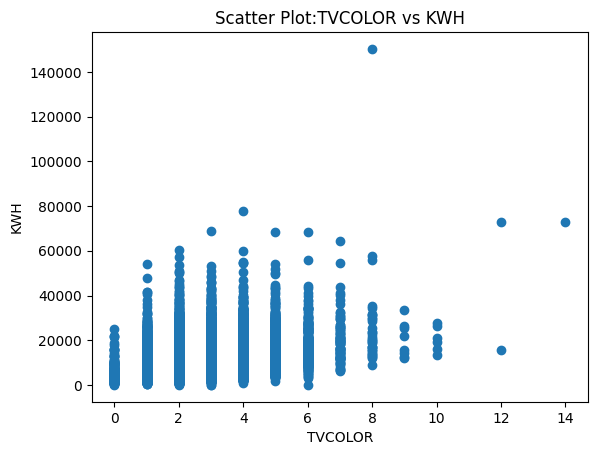

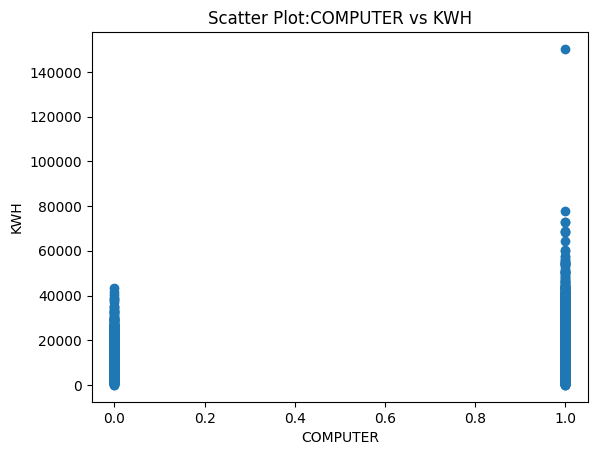

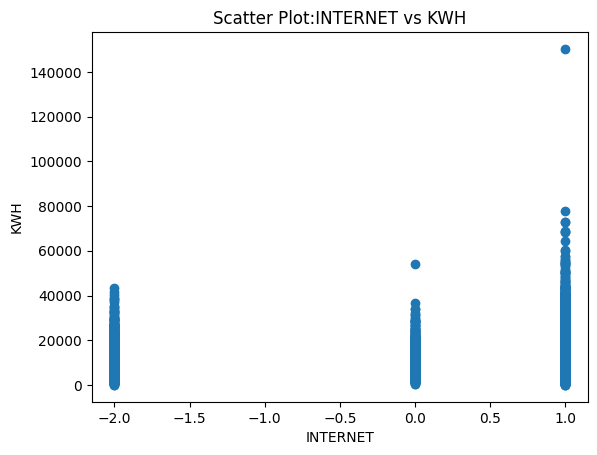

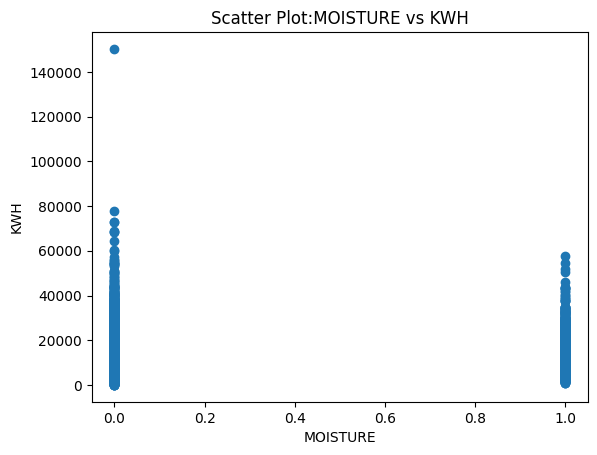

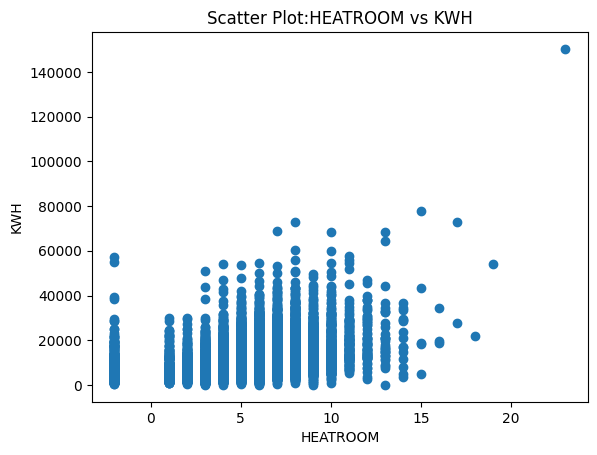

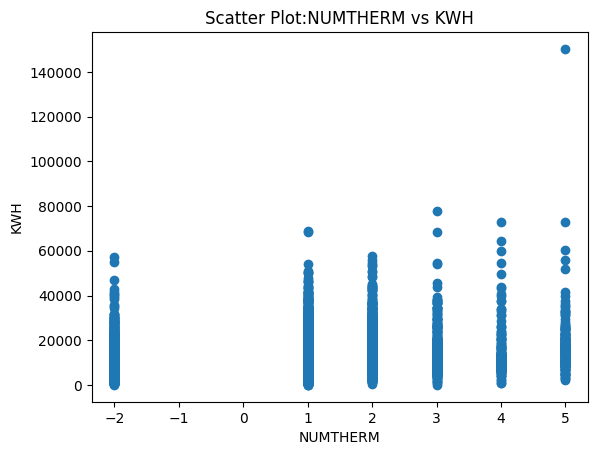

ValueError: x and y must be the same size

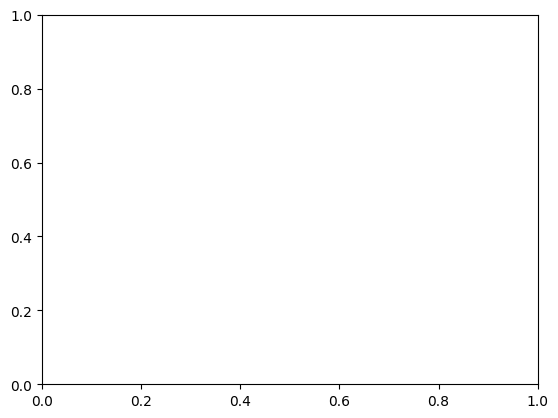

In [ ]:
column_to_plot = 'KWH'
all_columns = data.columns
# Create scatter plots
for column in all_columns:
    if column != column_to_plot:  # Avoid plotting the column against itself
        if(len(data[column])==len(data[column_to_plot])):
          plt.scatter(data[column],data[column_to_plot])
          plt.title(f'Scatter Plot:{column} vs {column_to_plot}')
          plt.xlabel(column)
          plt.ylabel(column_to_plot)
          plt.show()